In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.2
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

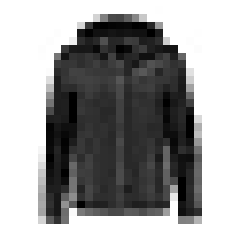

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

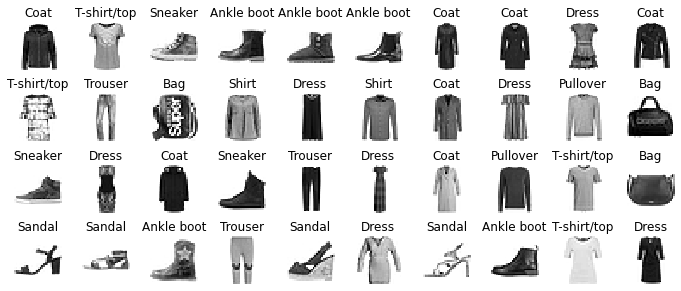

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad

Wykonaj analogiczne zadanie dla 
* Adam bez LearningRateScheduler i learning_rate=0.001
* Adam z użyciem LearningRateScheduler i learning_rate=0.001
* Adam z użyciem LearningRateScheduler i learning_rate=0.0001

Zwizualizuj wyniki:

* porównaj krzywe uczenia

In [11]:
from keras.callbacks import LearningRateScheduler
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

In [12]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_adam_1 = History()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Adam_1 = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam_1, metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32,epochs=30, callbacks=[history_adam_1])

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4858 - accuracy: 0.8239 - val_loss: 0.3673 - val_accuracy: 0.8626
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3655 - accuracy: 0.8655 - val_loss: 0.3434 - val_accuracy: 0.8744
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3299 - accuracy: 0.8772 - val_loss: 0.3229 - val_accuracy: 0.8834
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3044 - accuracy: 0.8862 - val_loss: 0.3219 - val_accuracy: 0.8852
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2869 - accuracy: 0.8933 - val_loss: 0.3245 - val_accuracy: 0.8826
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2707 - accuracy: 0.8973 - val_loss: 0.2999 - val_accuracy: 0.8930
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2578 - accuracy: 0.9026 - val_loss: 0.3161 - val_accur

In [13]:
history_adam_2 = History()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Adam_2 = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam_2, metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32,epochs=30, callbacks=[lrate, history_adam_2])

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5566 - accuracy: 0.8018 - val_loss: 0.4533 - val_accuracy: 0.8516 - lr: 0.0100
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4453 - accuracy: 0.8410 - val_loss: 0.4119 - val_accuracy: 0.8574 - lr: 0.0100
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4187 - accuracy: 0.8516 - val_loss: 0.4410 - val_accuracy: 0.8516 - lr: 0.0100
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4093 - accuracy: 0.8560 - val_loss: 0.4101 - val_accuracy: 0.8612 - lr: 0.0100
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3972 - accuracy: 0.8594 - val_loss: 0.4022 - val_accuracy: 0.8686 - lr: 0.0100
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3874 - accuracy: 0.8636 - val_loss: 0.4336 - val_accuracy: 0.8646 - lr: 0.0100
Epoch 7/30
1719/1719 [==============================] - 7s

In [14]:
history_adam_3 = History()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Adam_3 = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam_3, metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32,epochs=30, callbacks=[lrate, history_adam_3])

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5581 - accuracy: 0.8029 - val_loss: 0.4447 - val_accuracy: 0.8454 - lr: 0.0100
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4552 - accuracy: 0.8400 - val_loss: 0.4273 - val_accuracy: 0.8532 - lr: 0.0100
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4236 - accuracy: 0.8506 - val_loss: 0.4495 - val_accuracy: 0.8484 - lr: 0.0100
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4089 - accuracy: 0.8547 - val_loss: 0.4188 - val_accuracy: 0.8548 - lr: 0.0100
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3942 - accuracy: 0.8595 - val_loss: 0.4106 - val_accuracy: 0.8594 - lr: 0.0100
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3896 - accuracy: 0.8626 - val_loss: 0.4439 - val_accuracy: 0.8424 - lr: 0.0100
Epoch 7/30
1719/1719 [==============================] - 8s

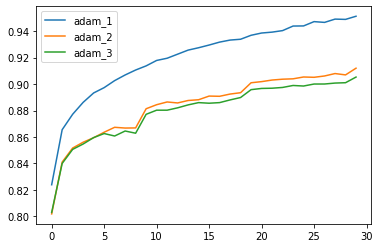

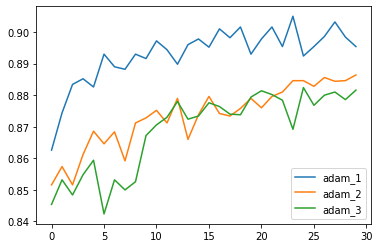

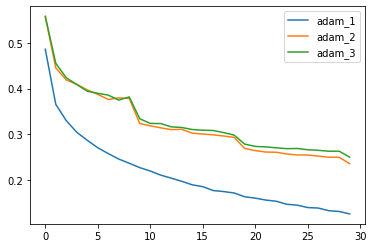

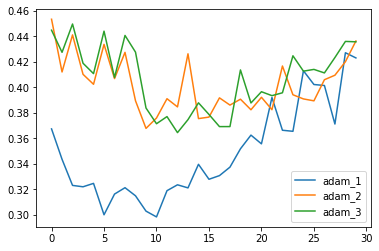

In [15]:
plt.plot(history_adam_1.history['accuracy'], label = "adam_1")
plt.plot(history_adam_2.history['accuracy'], label = "adam_2")
plt.plot(history_adam_3.history['accuracy'], label = "adam_3")
plt.legend()
plt.show()

plt.plot(history_adam_1.history['val_accuracy'], label = "adam_1")
plt.plot(history_adam_2.history['val_accuracy'], label = "adam_2")
plt.plot(history_adam_3.history['val_accuracy'], label = "adam_3")
plt.legend()
plt.show()

plt.plot(history_adam_1.history['loss'], label = "adam_1")
plt.plot(history_adam_2.history['loss'], label = "adam_2")
plt.plot(history_adam_3.history['loss'], label = "adam_3")
plt.legend()
plt.show()

plt.plot(history_adam_1.history['val_loss'], label = "adam_1")
plt.plot(history_adam_2.history['val_loss'], label = "adam_2")
plt.plot(history_adam_3.history['val_loss'], label = "adam_3")
plt.legend()
plt.show()